# Songs Dataset Analysis by Tejal Godara 23113152  
## Plan for the Analysis  
1. Set up the environment  
2. Load the dataset  
3. Data exploration & cleaning  
4. Univariate Analysis  
5. Multivariate Analysis  
6. Statistical Measures  
7. Visualizations (heatmaps, bar plots, scatter plots)  
8. Conclusions  



In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('ggplot')
sns.set_palette('viridis')


In [3]:
# loading dataset
df = pd.read_csv('songs.csv')
df.head()


,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,Kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,...,kygo,"['bring', 'me', 'higher', 'love,', 'love', '',...",Kygo,bring higher love love bring higher love think...,"['bring', 'higher', 'love', 'love', 'bring', '...",[-0.1148182 0.27755967 0.27891365 0.143460...,[-0.1148182 0.27755967 0.27891365 0.143460...,3,https://i.scdn.co/image/ab67616d0000b2737c8977...,https://open.spotify.com/track/6oJ6le65B3SEqPw...
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),Billieeilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,...,billie eilish,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'...",Billie Eilish,yeah yeah oh ah white shirt red bloody nose sl...,"['yeah', 'yeah', 'oh', 'ah', 'white', 'shirt',...",[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,1,https://i.scdn.co/image/ab67616d0000b273a69b8b...,https://open.spotify.com/track/3yNZ5r3LKfdmjoS...
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),Samfeldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,...,sam feldt,"['one', 'more', 'drink,', 'got', 'one', 'more'...",Sam Feldt,one drink got one bacardi one dance afterparty...,"['one', 'drink', 'got', 'one', 'bacardi', 'one...",[-0.1616459 0.21872164 0.3755187 0.116120...,[-0.1616459 0.21872164 0.37551871 0.116120...,3,https://i.scdn.co/image/ab67616d0000b27354de16...,https://open.spotify.com/track/0qc4QlcCxVTGySh...
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,Elliegoulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,...,ellie goulding,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'...",Ellie Goulding,sixteen sixteen remember moved mum said love s...,"['sixteen', 'sixteen', 'remember', 'moved', 'm...",[-0.17123666 0.15697554 0.2319686 0.190121...,[-0.17123666 0.15697554 0.2319686 0.190121...,3,https://i.scdn.co/image/ab67616d0000b27394181f...,https://open.spotify.com/track/4PkIDTPGedm0enz...
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,Katyperry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,...,katy perry,"[""i'm"", 'losing', 'my', 'self', 'control', '',...",Katy Perry,im losing self control yeah youre starting tri...,"['im', 'losing', 'self', 'control', 'yeah', 'y...",[-0.26988247 0.21529263 0.3686135 0.180054...,[-0.26988247 0.21529263 0.36861351 0.180054...,3,https://i.scdn.co/image/ab67616d0000b2739bea3b...,https://open.spotify.com/track/5PYQUBXc7NYeI1o...


In [4]:
# Checking columns
df.columns


Index(['Unnamed: 0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_release_date', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_merged', 'lyrics', 'artist_name', 'tags',
       'tags_tokenized', 'doc_vector', 'combined_vector', 'cluster',
       'image_url', 'spotify_url'],
      dtype='object')

In [5]:
# Check and clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['unnamed:_0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_release_date', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_merged', 'lyrics', 'artist_name', 'tags',
       'tags_tokenized', 'doc_vector', 'combined_vector', 'cluster',
       'image_url', 'spotify_url'],
      dtype='object')

In [6]:
# data cleaning 
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed:_0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist              900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    float64
 12  speechiness               900 non-null    float64
 13  acousticness              900 non-null    float64
 14  liveness  

,unnamed:_0,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,cluster
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,0.199545,0.623394,0.640775,0.484444,0.726726,0.574444,0.115008,0.225910,0.160050,0.518995,0.414709,211372.507778,2.003333
std,259.951919,0.199525,0.183919,0.181130,0.334353,0.111564,0.494702,0.133004,0.238884,0.139023,0.237509,0.208335,45092.774311,1.260767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104591.000000,0.000000
25%,224.750000,0.045455,0.504248,0.527578,0.181818,0.681972,0.000000,0.023636,0.043808,0.077727,0.334210,0.245323,181819.500000,1.000000
50%,449.500000,0.136364,0.652288,0.664127,0.454545,0.743644,1.000000,0.055262,0.140391,0.107691,0.515887,0.402658,206233.500000,2.000000
75%,674.250000,0.318182,0.749346,0.777873,0.818182,0.798564,1.000000,0.158157,0.326666,0.194965,0.705882,0.543679,232736.750000,3.000000
max,899.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,484147.000000,4.000000


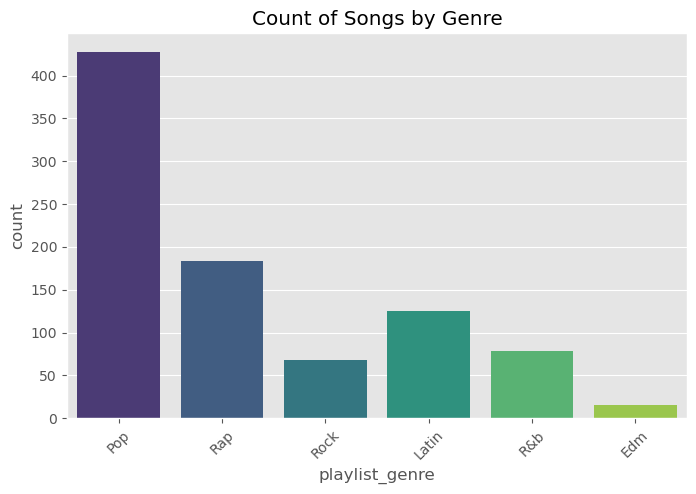

In [7]:
#Univariate analysis
# Count of songs by genre
plt.figure(figsize=(8, 5))
sns.countplot(x='playlist_genre', data=df)
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45)
plt.show()


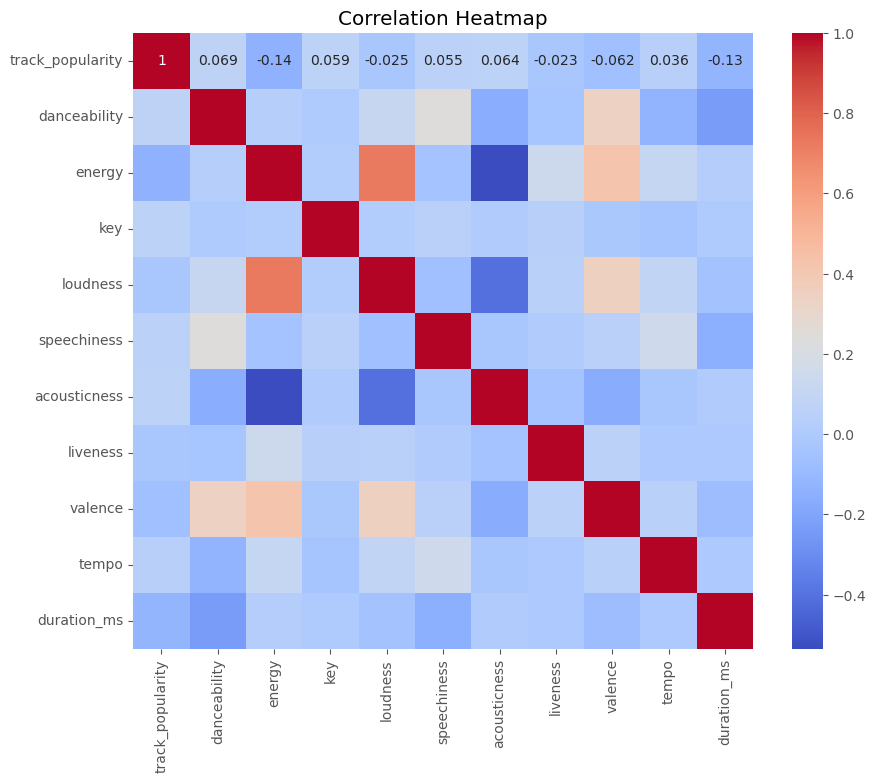

In [8]:
#multivariate analysis
# Select numerical columns for correlation heatmap
numerical_df = df[['track_popularity', 'danceability', 'energy', 'key', 'loudness',
                   'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']]

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


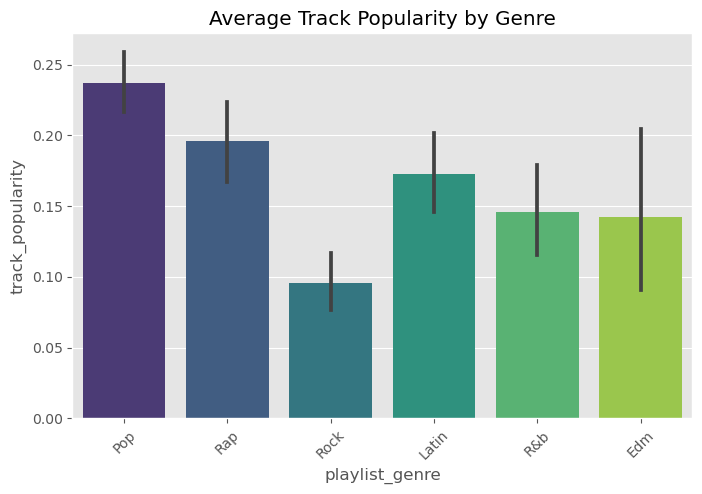

In [9]:
# Average track popularity by genre
plt.figure(figsize=(8, 5))
sns.barplot(x='playlist_genre', y='track_popularity', data=df)
plt.title('Average Track Popularity by Genre')
plt.xticks(rotation=45)
plt.show()


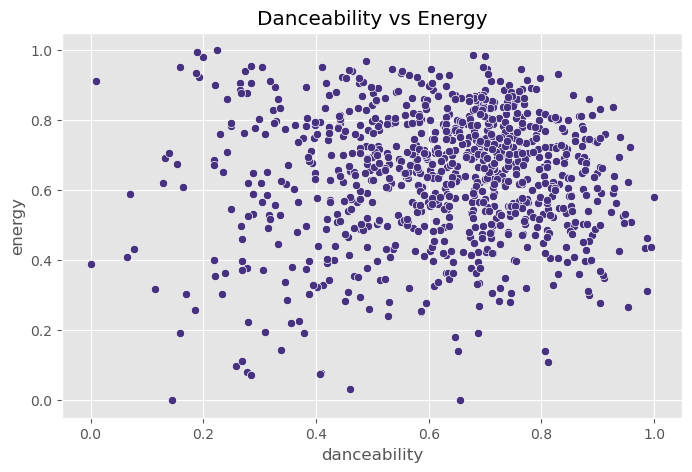

In [10]:
# Scatter plot: Danceability vs Energy
plt.figure(figsize=(8, 5))
sns.scatterplot(x='danceability', y='energy', data=df)
plt.title('Danceability vs Energy')
plt.show()


In [11]:
# Statistical measures calculation
popularity_mean = df['track_popularity'].mean()
popularity_median = df['track_popularity'].median()
popularity_mode = df['track_popularity'].mode()[0]

print(f"Mean Track Popularity: {popularity_mean}")
print(f"Median Track Popularity: {popularity_median}")
print(f"Mode Track Popularity: {popularity_mode}")


Mean Track Popularity: 0.19954545454545458
Median Track Popularity: 0.1363636363636362
Mode Track Popularity: 0.0


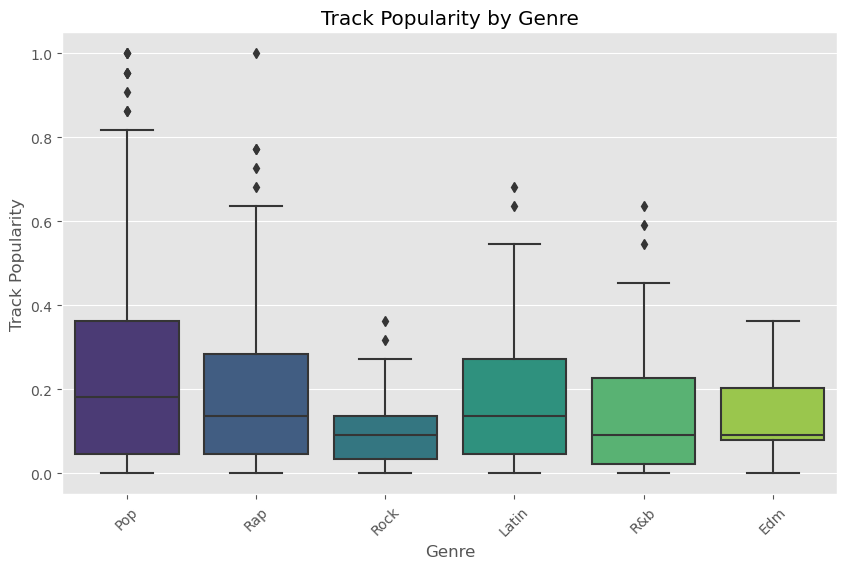

In [12]:
# Track popularity by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df, palette='viridis')
plt.title('Track Popularity by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Track Popularity')
plt.show()



C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

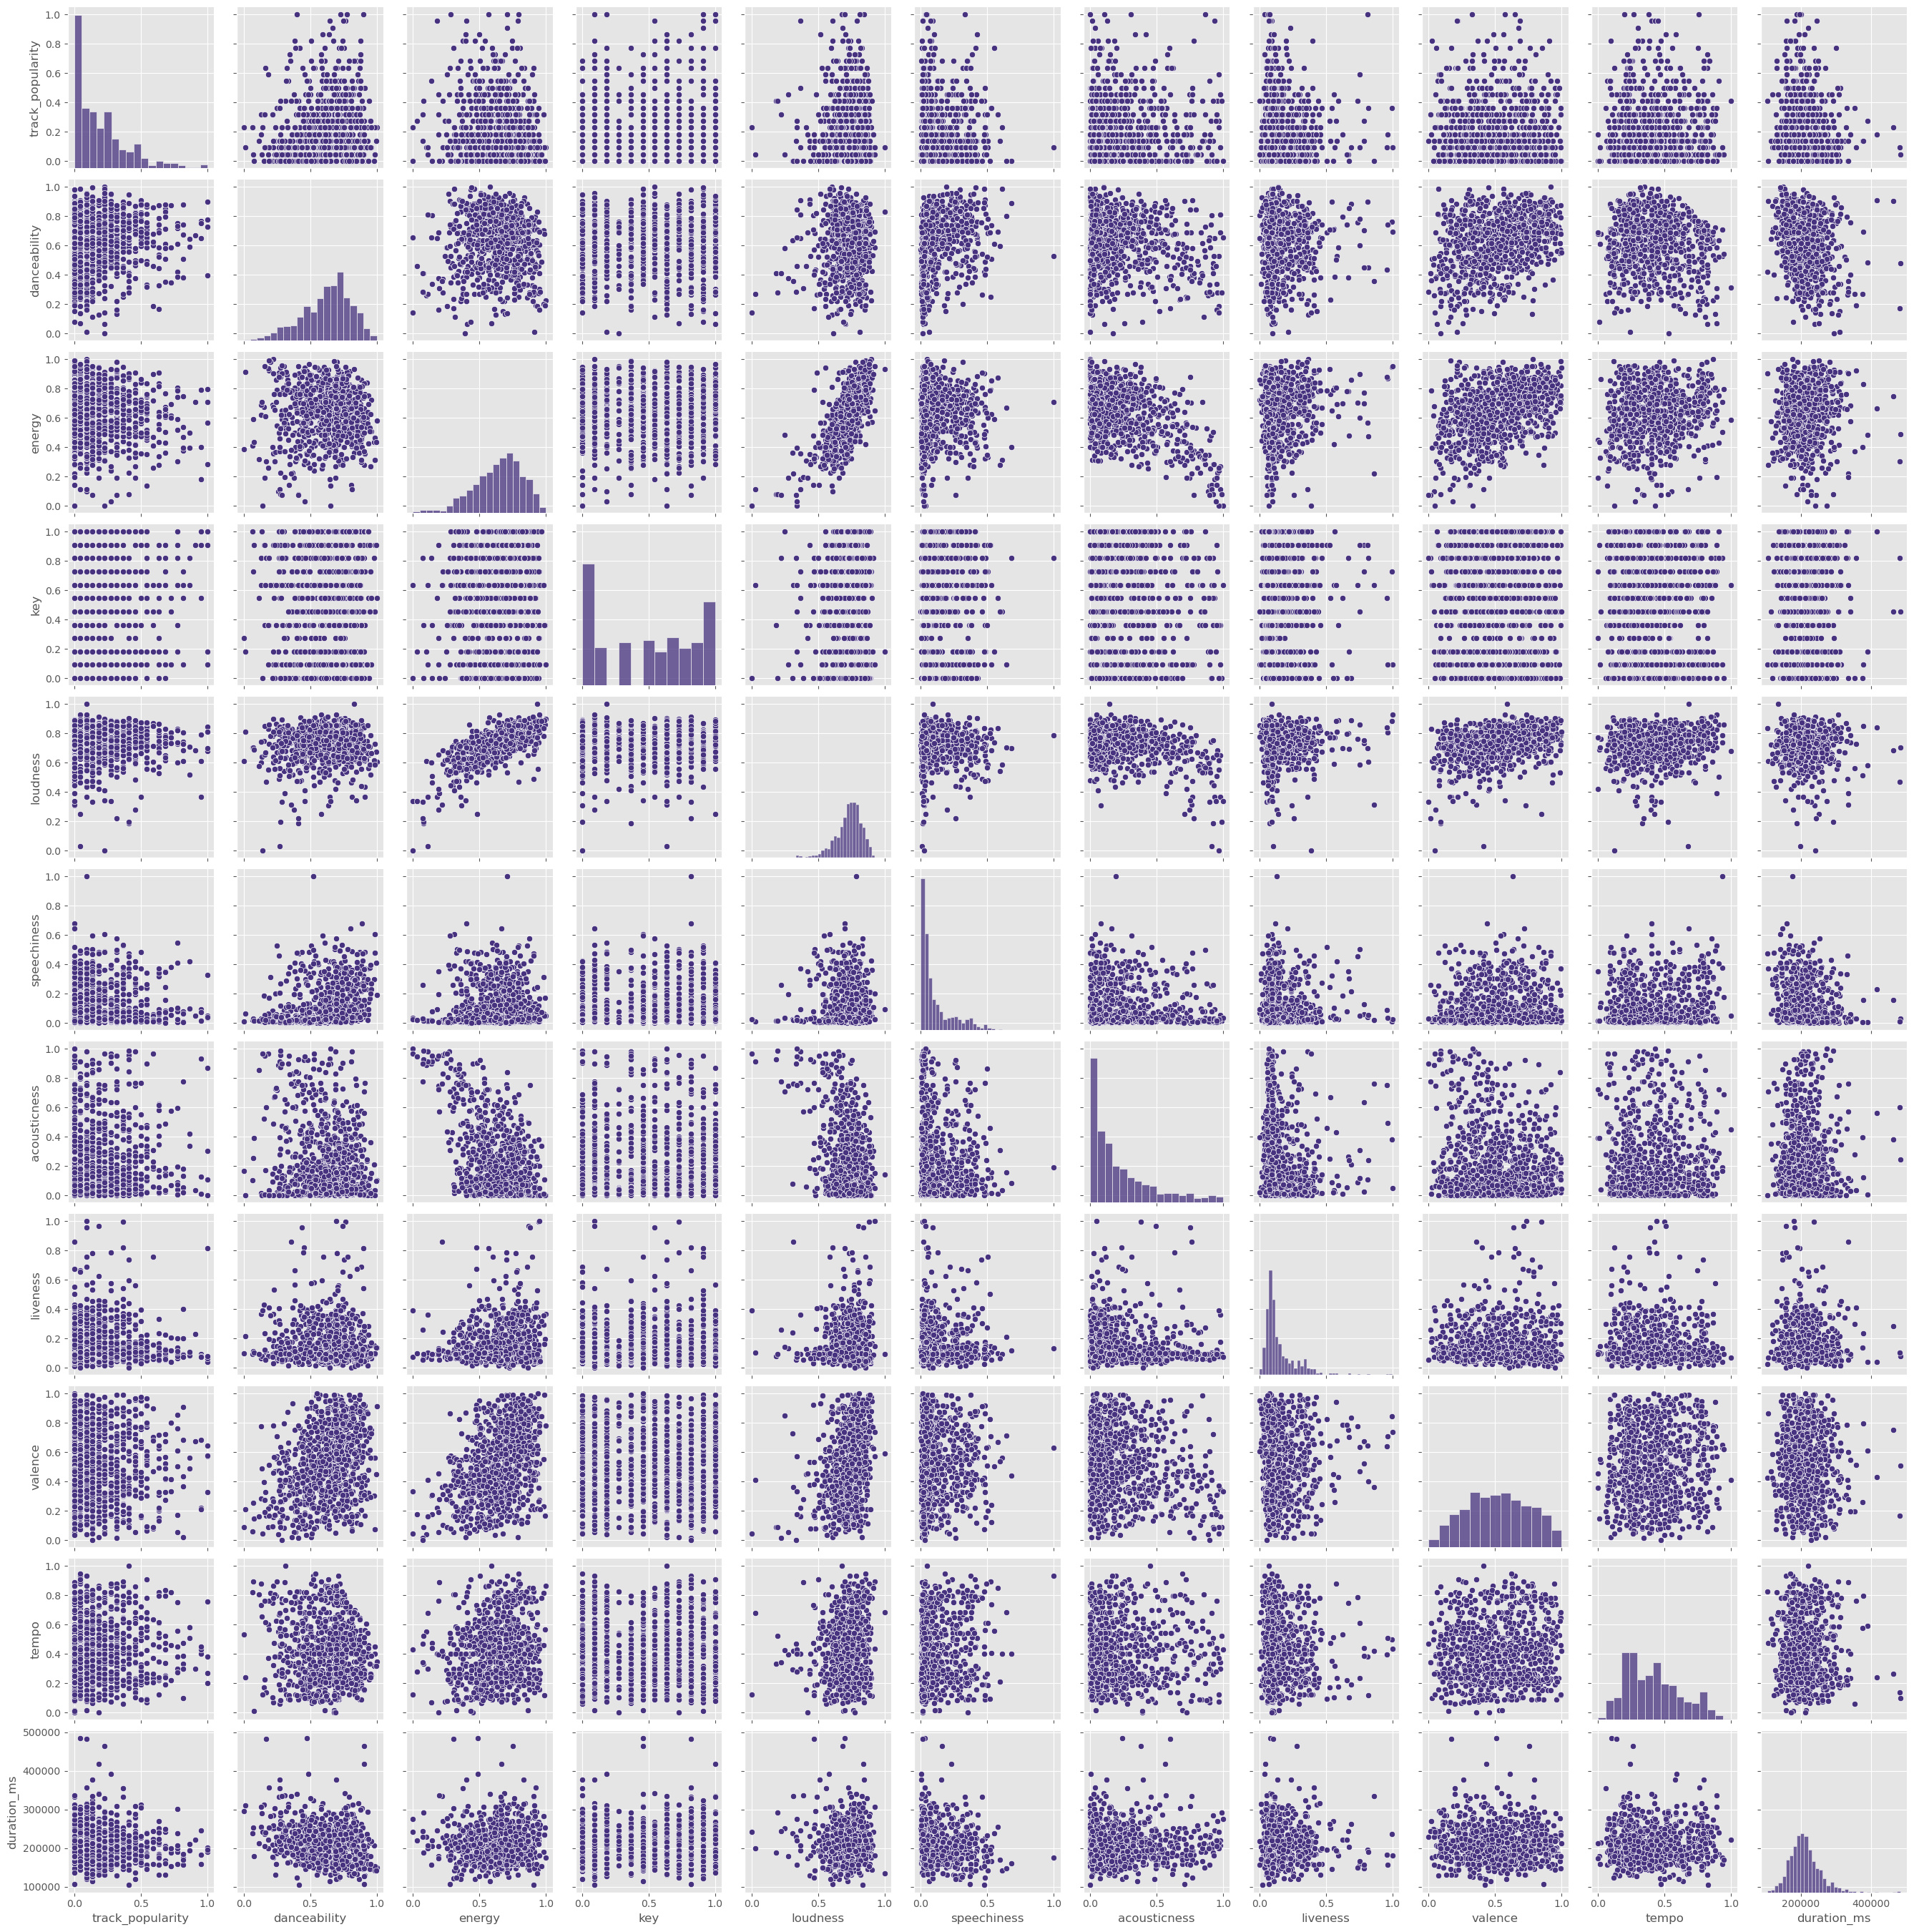

In [13]:
# Pair plot 
sns.pairplot(numerical_df)
plt.show()


# Conclusions
- Certain genres consistently produce more popular tracks.
- Danceability and energy show some correlation.
- Popularity has varied distribution across different genres.
